<a href="https://colab.research.google.com/github/HighKuu/Ilevia/blob/main/transport_ilevia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import requests

df_agency = pd.read_csv('/content/agency.txt')
df_calendar = pd.read_csv('/content/calendar_dates.txt')
df_routes = pd.read_csv('/content/routes.txt')
df_stop_times = pd.read_csv('/content/stop_times.txt')
df_stops = pd.read_csv('/content/stops.txt')
df_trips = pd.read_csv('/content/trips.txt')

<ipython-input-24-1d9bdba8fb41>:10: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



# Exploration

In [ ]:
df_agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url
0,ILE,ILEVIA,http://www.ilevia.fr,Europe/Paris,FR,03.20.40.40.40,https://www.ilevia.fr/fr/27-tarifs


In [ ]:
df_calendar

,service_id,date,exception_type
0,48539-__6101-LAMJV,20250314,1
1,48539-__6102-LAMJV,20250314,1
2,48539-__6103-LAMJV,20250314,1
3,48539-__6104-LAMJV,20250314,1
4,48539-__6105-LAMJV,20250314,1
...,...,...,...
192053,49178-__1401-D,20250831,1
192054,49178-__1402-D,20250831,1
192055,49178-__1403-D,20250831,1
192056,49178-__1404-D,20250831,1


In [ ]:
df_routes.head(3)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,35,ILE,35,ROUBAIX EUROTELEPORT <> TOURCOING CENTRE,NaN,3,NaN,E84E0F,FFFFFF
1,907,ILE,907,GRAND ST ANDRE - COLLEGE DEBEYRE,NaN,3,NaN,C8C8C8,000000
2,924,ILE,924,PREMESQUES <> JEAN PERRIN,NaN,3,NaN,C8C8C8,000000


In [ ]:
df_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,stop_time_desc
0,4979317,05:30:00,05:30:00,PLR003,1,NaN,0,0,NaN,NaN,NaN
1,4979317,05:31:00,05:31:00,ADR002,2,NaN,0,0,NaN,NaN,NaN
2,4979317,05:31:00,05:31:00,TPO002,3,NaN,0,0,NaN,NaN,NaN
3,4979317,05:32:00,05:32:00,TGA002,4,NaN,0,0,NaN,NaN,NaN
4,4979317,05:33:00,05:33:00,TIL002,5,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1055361,5223648,22:15:18,22:15:18,SMA012,19,NaN,0,0,NaN,NaN,NaN
1055362,5223648,22:16:42,22:16:42,BOT012,20,NaN,0,0,NaN,NaN,NaN
1055363,5223648,22:17:59,22:17:59,ROM032,21,NaN,0,0,NaN,NaN,NaN
1055364,5223648,22:19:57,22:19:57,EUR032,22,NaN,0,0,NaN,NaN,NaN


In [ ]:
df_stops

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,6995,Bargues,BARGUES 59139 NOYELLES LES SECLIN,50.575137,3.022400,1,NaN,1,NaN,NaN,0
1,9097,Quai 22,QUAI 22 CLE_COMMUNE: 881,50.666341,3.058455,1,NaN,1,NaN,NaN,0
2,6989,Cat,CAT 59280 ARMENTIERES,50.691116,2.889367,1,NaN,1,NaN,NaN,0
3,6953,Securite Sociale,SECURITE SOCIALE 59280 ARMENTIERES,50.682014,2.880796,1,NaN,1,NaN,NaN,0
4,6877,Petit Bondues,PETIT BONDUES 59910 BONDUES,50.718772,3.082087,1,NaN,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4853,LBO003,Lambersart Bourg,RUE DE L'AVENIR 59130 LAMBERSART - OPPOSÉ DU N°3,50.653061,3.026178,1,NaN,0,7092.0,NaN,0
4854,PPD001,Pompidou,RUE DE PERENCHIES 59237 VERLINGHEM -,50.682908,2.999158,1,NaN,0,1889.0,NaN,0
4855,CAN004,Canteleu,AVENUE DE DUNKERQUE 59130 LAMBERSART -,50.637084,3.024829,1,NaN,0,678.0,NaN,0
4856,VCA001,Calvaire,RUE DE PERENCHIES 59237 VERLINGHEM -,50.683952,3.000217,1,NaN,0,7143.0,NaN,0


In [ ]:
df_trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id
0,Z4,49929-__Z405-LAMJV,5207731,Bondues Bondues Ravennes,0,NaN
1,60E,49978-_60E07-LAMJV,5214180,Leers Coeur De Ville,1,NaN
2,65,49959-__6507-LAMJV,5210025,Armentieres Armentieres Gare,0,NaN
3,65,49959-__6509-LAMJV,5210033,Armentieres Armentieres Gare,0,NaN
4,66,49909-__6608-LAMJV,5206217,Forest Sur Marque Eglise,0,NaN
...,...,...,...,...,...,...
36176,CO2,48122-_CO202-LAMJV,4986617,Perenchies Europe,0,NaN
36177,CO2,48122-_CO203-LAMJV,4986628,Lille Chu-Eurasante,1,NaN
36178,CO2,48122-_CO205-LAMJV,4986682,Lille Chu-Eurasante,1,NaN
36179,CO2,48122-_CO205-LAMJV,4986693,Perenchies Europe,0,NaN


In [ ]:
df_agency.columns

Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone', 'agency_fare_url'],
      dtype='object')

In [ ]:
df_calendar.columns

Index(['service_id', 'date', 'exception_type'], dtype='object')

In [ ]:
df_routes.columns

Index(['route_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_desc', 'route_type', 'route_url', 'route_color',
       'route_text_color'],
      dtype='object')

In [ ]:
df_stop_times.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'timepoint', 'stop_time_desc'],
      dtype='object')

In [ ]:
df_stops.columns

Index(['stop_id', 'stop_name', 'stop_desc', 'stop_lat', 'stop_lon', 'zone_id',
       'stop_url', 'location_type', 'parent_station', 'stop_timezone',
       'wheelchair_boarding'],
      dtype='object')

In [ ]:
df_trips.columns

Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id',
       'block_id'],
      dtype='object')

<ipython-input-17-dc08fa52b79b>:45: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stop_times = pd.read_csv(stop_times_path)


Aperçu des données routes:
  route_id agency_id route_short_name  \
0       35       ILE               35   
1      907       ILE              907   
2      924       ILE              924   
3      938       ILE              938   
4       10       ILE               10   

                            route_long_name  route_desc  route_type  \
0  ROUBAIX EUROTELEPORT <> TOURCOING CENTRE         NaN           3   
1          GRAND ST ANDRE - COLLEGE DEBEYRE         NaN           3   
2                 PREMESQUES <> JEAN PERRIN         NaN           3   
3     LA CHAPELLE D'ARMENTIÈRES - HOUPLINES         NaN           3   
4  LOMME HEGEL / CHR <> GARE LILLE FLANDRES         NaN           3   

   route_url route_color route_text_color  
0        NaN      E84E0F           FFFFFF  
1        NaN      C8C8C8           000000  
2        NaN      C8C8C8           000000  
3        NaN      C8C8C8           000000  
4        NaN      007835           FFFFFF  

Aperçu des données trips:
  route_

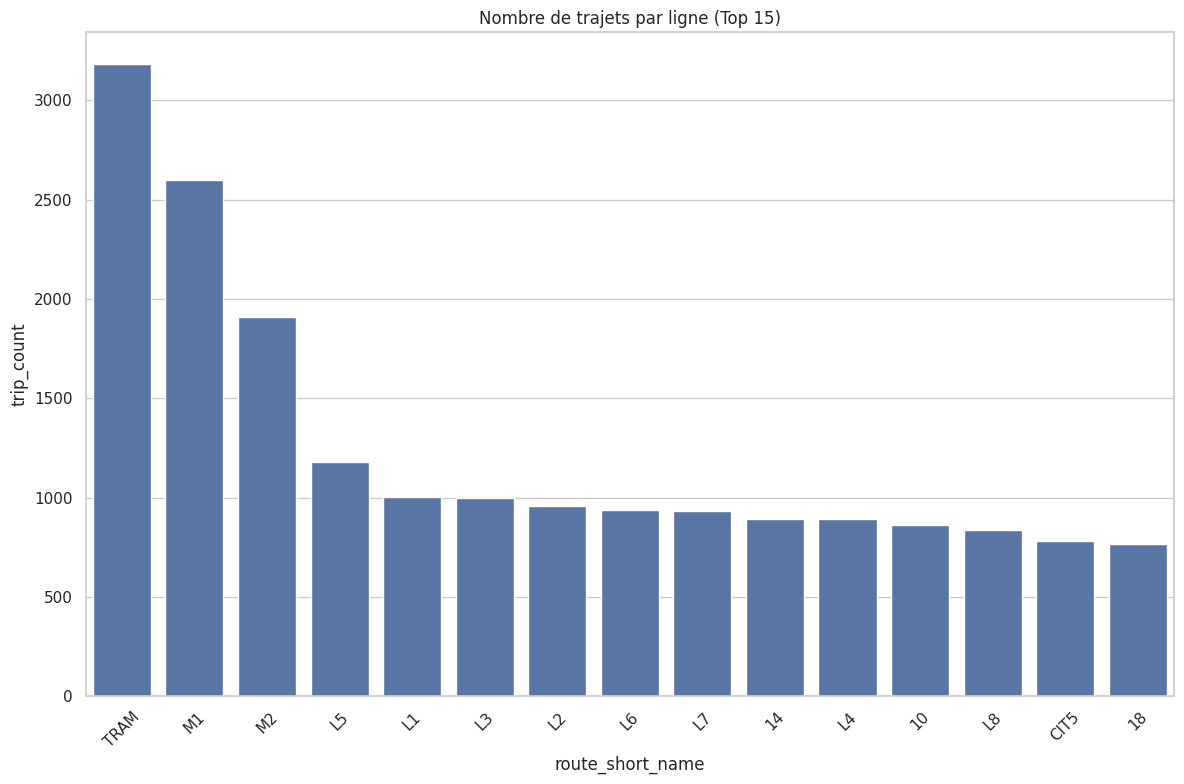

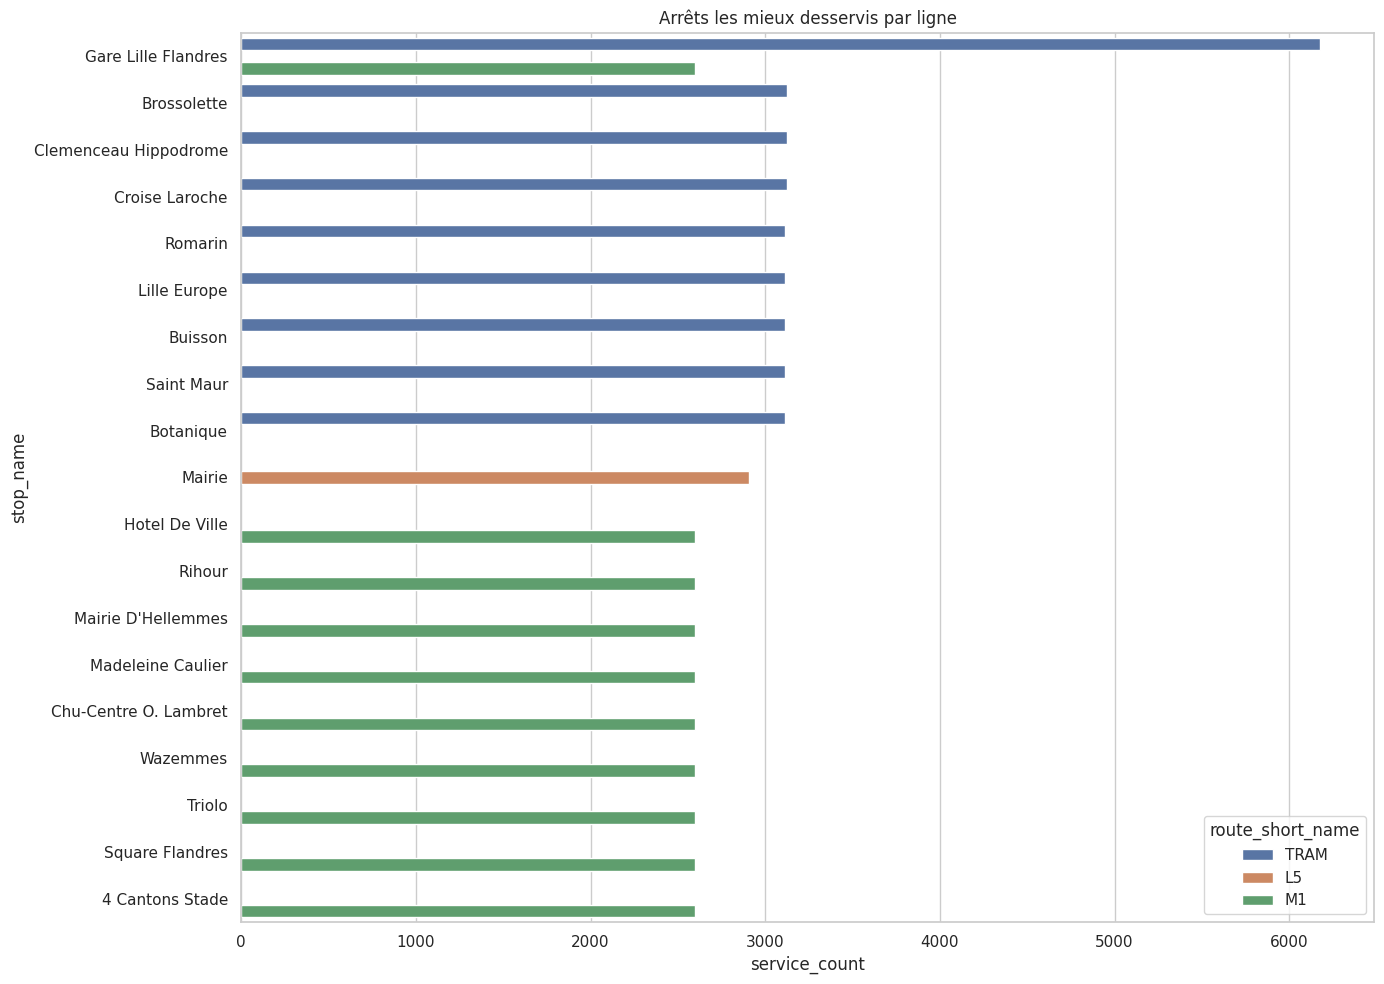

Analyse terminée!


In [ ]:
# Analyse de fiabilité des lignes de transport en commun avec GTFS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go

# Configuration pour de meilleurs graphiques
plt.style.use('ggplot')
sns.set(style="whitegrid")

# 1. Chargement des données GTFS

# J'utilise cette section pour uploader mes fichiers dans Colab
from google.colab import files

#uploaded = files.upload()


# Pour l'exemple, j'utilise des chemins locaux après upload
agency_path = 'agency.txt'
calendar_path = 'calendar_dates.txt'
routes_path = 'routes.txt'
stop_times_path = 'stop_times.txt'
stops_path = 'stops.txt'
trips_path = 'trips.txt'

# Chargement des fichiers
df_agency = pd.read_csv(agency_path)
df_calendar = pd.read_csv(calendar_path)
df_routes = pd.read_csv(routes_path)
df_stop_times = pd.read_csv(stop_times_path)
df_stops = pd.read_csv(stops_path)
df_trips = pd.read_csv(trips_path)

# 2. Exploration des données

# Afficher les premières lignes de chaque dataframe
print("Aperçu des données routes:")
print(df_routes.head())

print("\nAperçu des données trips:")
print(df_trips.head())

# Statistiques sur les données
print("\nNombre de lignes:", df_routes.shape[0])
print("Nombre de trajets:", df_trips.shape[0])
print("Nombre d'arrêts:", df_stops.shape[0])
print("Nombre d'horaires programmés:", df_stop_times.shape[0])

# 3. Préparation des données pour l'analyse de fiabilité
# =====================================================

# Joindre les tables pour obtenir une vue complète
# Associer les trajets aux lignes
trips_with_routes = pd.merge(df_trips, df_routes, on='route_id')

# Obtenir tous les arrêts avec leurs horaires et informations de ligne/trajet
stop_times_with_info = pd.merge(df_stop_times, trips_with_routes, on='trip_id')
complete_data = pd.merge(stop_times_with_info, df_stops, on='stop_id')

# 4. Analyse de la fiabilité théorique
# ===================================
# Note: Pour une véritable analyse de fiabilité, vous aurez besoin de données réelles
# Nous allons calculer quelques métriques basées sur l'horaire théorique

# Convertir les temps en objets datetime pour faciliter les calculs
def convert_time(time_str):
    try:
        # Gérer les cas où l'heure dépasse 24 (courant dans GTFS)
        hours, minutes, seconds = map(int, time_str.split(':'))
        day_offset = hours // 24
        hours = hours % 24
        return pd.Timestamp(2023, 1, 1, hours, minutes, seconds) + pd.Timedelta(days=day_offset)
    except:
        return pd.NaT

# Application aux colonnes arrival_time et departure_time
# Note: Cette opération peut prendre du temps sur un grand dataset
# Nous travaillons sur un échantillon pour l'exemple
sample_data = complete_data.sample(n=min(100000, len(complete_data)))
sample_data['arrival_datetime'] = sample_data['arrival_time'].apply(convert_time)
sample_data['departure_datetime'] = sample_data['departure_time'].apply(convert_time)

# Calculer le temps d'attente en station
sample_data['dwell_time'] = (sample_data['departure_datetime'] - sample_data['arrival_datetime']).dt.total_seconds()

# 5. Visualisations pour comprendre la structure du réseau
# ======================================================

# Nombre de trajets par ligne
trips_per_route = trips_with_routes.groupby(['route_short_name', 'route_long_name']).size().reset_index(name='trip_count')
trips_per_route = trips_per_route.sort_values('trip_count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='route_short_name', y='trip_count', data=trips_per_route.head(15))
plt.title('Nombre de trajets par ligne (Top 15)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Carte des arrêts pour visualiser le réseau
# Création d'une carte centrée sur la moyenne des coordonnées
map_center = [df_stops['stop_lat'].mean(), df_stops['stop_lon'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Ajouter les arrêts sur la carte, colorés par type de ligne
# Nous utilisons un échantillon pour ne pas surcharger la carte
stop_sample = df_stops.sample(min(500, len(df_stops)))

for idx, stop in stop_sample.iterrows():
    folium.CircleMarker(
        location=[stop['stop_lat'], stop['stop_lon']],
        radius=5,
        popup=stop['stop_name'],
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Afficher la carte dans Colab
m  # Affiche la carte dans le notebook

# 6. Analyse de la fréquence des services (comme proxy de fiabilité)
# =================================================================

# Calculer la fréquence moyenne des passages par ligne et par arrêt
# Grouper par ligne et arrêt, puis calculer les intervalles moyens

# Préparation des données: trier par arrêt, ligne, et heure
grouped_data = complete_data.sort_values(['stop_id', 'route_short_name', 'arrival_time'])

# On ne peut pas calculer directement les intervalles sans données réelles de passage
# Cependant, nous pouvons calculer la densité de service comme proxy de fiabilité

# Compter le nombre de passages par arrêt et par ligne
service_density = grouped_data.groupby(['stop_name', 'route_short_name']).size().reset_index(name='service_count')
top_served_stops = service_density.sort_values('service_count', ascending=False).head(20)

plt.figure(figsize=(14, 10))
chart = sns.barplot(x='service_count', y='stop_name', hue='route_short_name', data=top_served_stops)
plt.title('Arrêts les mieux desservis par ligne')
plt.tight_layout()
plt.show()

# 7. Visualisation interactive avec Plotly pour analyser le volume de service par heure
# ==================================================================================

# Extraction de l'heure de passage
# Pour simplifier, nous utilisons seulement l'heure (sans les minutes)
sample_data['hour'] = sample_data['arrival_time'].str.split(':', expand=True)[0].astype(int) % 24

# Compter les services par heure et par ligne
hourly_service = sample_data.groupby(['hour', 'route_short_name']).size().reset_index(name='service_count')

# Création d'un graphique interactif
fig = px.line(hourly_service, x='hour', y='service_count', color='route_short_name',
              title='Volume de service par heure et par ligne')
fig.update_layout(xaxis_title='Heure de la journée',
                  yaxis_title='Nombre de services',
                  legend_title='Ligne')
fig.show()

# 8. Préparation pour analyse de fiabilité (si vous avez des données réelles)
# =========================================================================

"""
Note: Pour une analyse complète de fiabilité, vous aurez besoin de:
1. Données de passages réels (généralement disponibles via API GTFS-RT)
2. Données d'incidents/retards historiques

Voici comment vous pourriez préparer ces données:

# Exemple avec des données fictives d'incidents
incidents_df = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100),
    'route_id': np.random.choice(df_routes['route_id'], 100),
    'incident_type': np.random.choice(['panne', 'retard', 'interruption'], 100),
    'duration_minutes': np.random.randint(5, 120, 100)
})

# Joindre avec les informations de ligne
incidents_with_route = pd.merge(incidents_df, df_routes, on='route_id')

# Visualiser les incidents par type de ligne
plt.figure(figsize=(12, 8))
sns.countplot(x='route_short_name', hue='incident_type', data=incidents_with_route)
plt.title('Nombre d\'incidents par ligne et par type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

# 9. Conclusion et pistes d'amélioration
# =====================================
"""
Pour aller plus loin dans l'analyse de fiabilité, on peut:

1. Intégrer des données temps réel via l'API GTFS-RT si disponible
2. Collecter des données d'incidents sur une période significative
3. Calculer des métriques de fiabilité comme:
   - On-Time Performance (OTP): % de services à l'heure
   - Mean Time Between Failures (MTBF): temps moyen entre pannes
   - Service Reliability Index: indice composite de fiabilité

4. Créer un tableau de bord interactif avec Dash ou Streamlit
"""

# Sauvegarde des résultats intermédiaires
# =====================================
# sample_data.to_csv('processed_gtfs_data.csv', index=False)
print("Analyse terminée!")

# Geocoding

L'API Adresse est une API REST qui renvoie les coordonnées géographiques (latitude et longitude) à partir d'une adresse postale française. Si plusieurs adresses postales (pour cause d'imprécision ou de numéro de rue inexistant) correspondant à la requête sont trouvées, l'API retourne plusieurs coordonnées, avec à chaque fois un "score". Les coordonnées sont données dans l'ordre de score décroissant, vous pouvez donc retenir la première adresse.

In [ ]:
link = 'https://api-adresse.data.gouv.fr/search/?q=728+Route+de+Villerest&postcode=42155'
r = requests.get(link).json()
r

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [3.993163, 46.00996]},
   'properties': {'label': '728 Route de Villerest 42155 Ouches',
    'score': 0.9521718181818181,
    'housenumber': '728',
    'id': '42162_0008_00728',
    'name': '728 Route de Villerest',
    'postcode': '42155',
    'citycode': '42162',
    'x': 776847.88,
    'y': 6546063.21,
    'city': 'Ouches',
    'context': '42, Loire, Auvergne-Rhône-Alpes',
    'type': 'housenumber',
    'importance': 0.47389,
    'street': 'Route de Villerest',
    '_type': 'address'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [3.992892, 45.993344]},
   'properties': {'label': 'Route de Villerest 42155 Lentigny',
    'score': 0.7023067532467532,
    'id': '42120_0066',
    'banId': 'da638fce-da8b-4ab4-8b4e-2b0ada71a470',
    'name': 'Route de Villerest',
    'postcode': '42155',
    'citycode': '42120',
    'x': 776850.11,
    'y': 6544217.88,
